# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
# this is from lenet2_copy1/lenet2

In [2]:
# from tensorflow.examples.tutorials.mnist import input_data

# mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
# X_train, y_train           = mnist.train.images, mnist.train.labels
# X_validation, y_validation = mnist.validation.images, mnist.validation.labels
# X_test, y_test             = mnist.test.images, mnist.test.labels

# assert(len(X_train) == len(y_train))
# assert(len(X_validation) == len(y_validation))
# assert(len(X_test) == len(y_test))

# print()
# print("Image Shape: {}".format(X_train[0].shape))
# print()
# print("Training Set:   {} samples".format(len(X_train)))
# print("Validation Set: {} samples".format(len(X_validation)))
# print("Test Set:       {} samples".format(len(X_test)))

# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

datadir = "traffic-signs-data"
# datadir = "helio_data"

training_file = datadir + "/train.p"
validation_file= datadir + "/valid.p"
testing_file = datadir + "/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: Number of validation examples.
n_valid = len(y_validation)

# TODO: What's the shape of an traffic sign image?
image_shape = image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

img_size=X_train.shape[1] #Size of input images

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [3]:
# import numpy as np

# # Pad images with 0s
# X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
# print("Updated Image Shape: {}".format(X_train[0].shape))

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

10


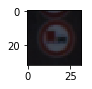

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

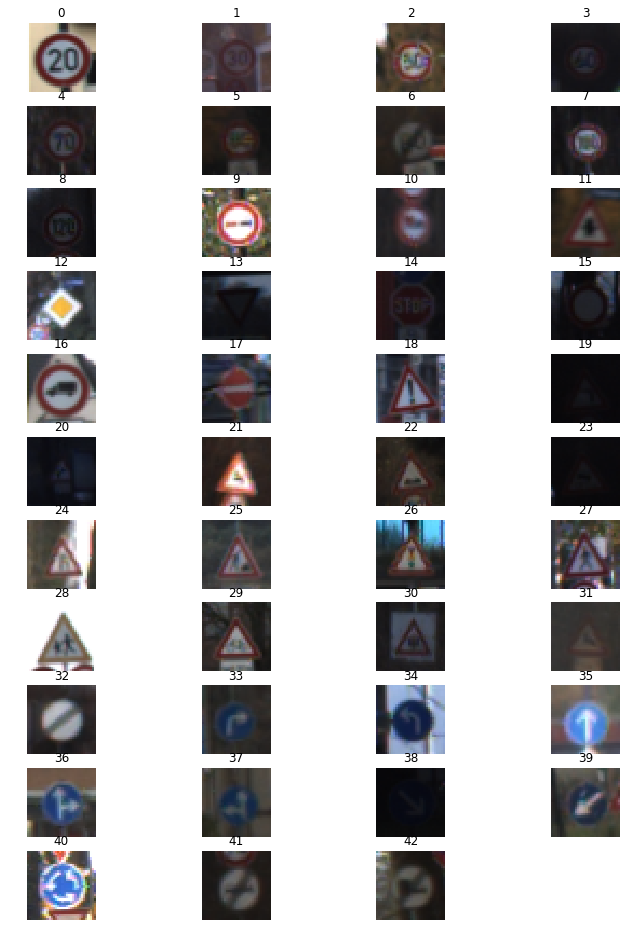

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.

def plot_labels(X_data, y_data):
    %matplotlib inline

    num_of_samples=[]
    plt.figure(figsize=(12, 16.5))
    for i in range(0, n_classes):
        plt.subplot(11, 4, i+1)
        x_selected = X_data[y_data == i]
    #     print(len(x_selected))
        plt.imshow(x_selected[0, :, :, :]) #to draw the first image in each label/class
        plt.title(i)
        plt.axis('off')
        num_of_samples.append(len(x_selected))
    plt.show()

    #Plot number of images per class
#     plt.figure(figsize=(12, 4))
#     plt.bar(range(0, n_classes), num_of_samples)
#     plt.title("Distribution of the training dataset")
#     plt.xlabel("Class/Label")
#     plt.ylabel("No of images")
#     plt.show()

#     print("Min number of images per class =", min(num_of_samples))
#     print("Max number of images per class =", max(num_of_samples))
    
plot_labels(X_train, y_train)

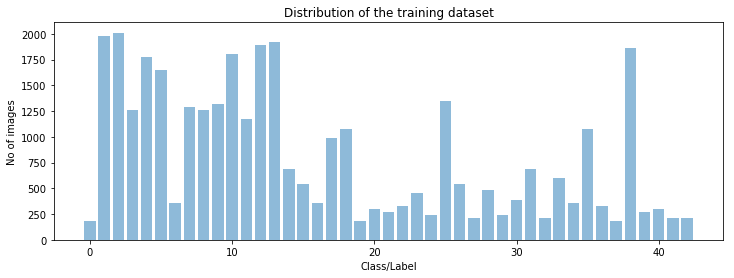

In [6]:
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def show_dist(y_data):
    l = len(set(y_data))
    values = Counter(y_data).values()
    keys = Counter(y_data).keys()
    # print(values)
    # print(keys)
    # plt.show()
    # plt.pie([float(v) for v in values], labels=[float(k) for k in keys],
    #            autopct=None)
    # plt.show()
    plt.figure(figsize=(12, 4))
    plt.bar([float(k) for k in keys], [float(v) for v in values], align='center', alpha=0.5)
    plt.title("Distribution of the training dataset")
    plt.xlabel("Class/Label")
    plt.ylabel("No of images")
    plt.show()
    
show_dist(y_train)

In [7]:
# Convert to grayscale
X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)

X_validation_rgb = X_validation
X_validation_gry = np.sum(X_validation/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale Train shape:', X_train_gry.shape)

print('Grayscale Validation shape:', X_validation_gry.shape)

print('Grayscale Test shape:', X_test_gry.shape)

RGB shape: (34799, 32, 32, 3)
Grayscale Train shape: (34799, 32, 32, 1)
Grayscale Validation shape: (4410, 32, 32, 1)
Grayscale Test shape: (12630, 32, 32, 1)


In [8]:
print(np.mean(X_train_gry))
print(np.mean(X_validation_gry))
print(np.mean(X_test_gry))

82.677589037
83.5564273756
82.1484603612


In [9]:
# Normalize (-1 to 1)  --- not used
X_train_gry_normalized = (X_train_gry - 128)/128 
X_test_gry_normalized = (X_test_gry - 128)/128
# X_validation_gry_normalized = (X_validation_gry - 128)/128

print(np.mean(X_train_gry_normalized))
print(np.mean(X_test_gry_normalized))
# print(np.mean(X_validation_gry_normalized))

-0.354081335648
-0.358215153428


Number of extended training examples = 86430
Shape (86430, 32, 32, 1)


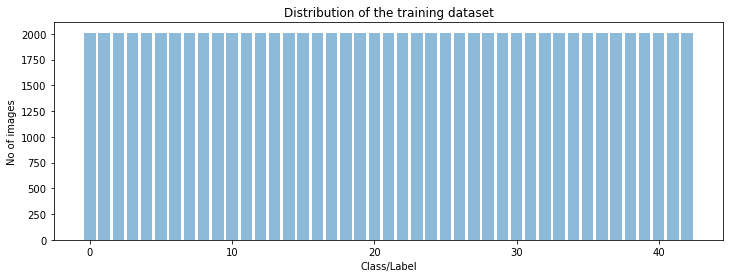

In [10]:
# Smoothen out the distribution by extending the data 

import cv2
import numpy as np

def rotate_img(img):
    center_x,center_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    matrix = cv2.getRotationMatrix2D((center_x, center_y), ang, 1.0)
#     print(img.shape[:2])
    img = cv2.warpAffine(img, matrix, img.shape[:2])
    img = img[:,:,np.newaxis]
#     print(img.shape)
    return img




def extend_data(X_data, y_data):
    samples_per_class = np.bincount(y_data)
# print("Samples per class is ", samples_per_class)
    max_samples = max(samples_per_class)
# print("Max Samples ", max_samples)
    rotated_images = []
    rotated_labels = []
    for i in range(0, n_classes):
        x_selected = X_data[y_data == i]    # get all images for a label/class
        l = len(x_selected)                  # get no of such images
        diff = max_samples -l                 # get diff with max
        if diff > 0:                               
    #         print(i, "--", len(x_selected))
            if diff < l:
                for j in range(0, diff):                      # loop over the diff to rotate image
                    rotated_img = rotate_img(x_selected[j, :, :, :])
    #                 print(rotated_img.shape)
                    rotated_images.append(rotated_img)
                    rotated_labels.append(i)
            else:
                dvmd = divmod(diff, l)
                for m in range(0,dvmd[0]):
                    for j in range(0, l): 
                        rotated_img = rotate_img(x_selected[j, :, :, :])
                        rotated_images.append(rotated_img)
                        rotated_labels.append(i)
                if dvmd[1] > 0:
                    for n in range(0,dvmd[1]):
                        rotated_img = rotate_img(x_selected[j, :, :, :])
                        rotated_images.append(rotated_img)
                        rotated_labels.append(i)
    
    X_extended = np.append(X_data, rotated_images, axis=0)

    y_extended = np.append(y_data, rotated_labels, axis=0)
    
    return X_extended, y_extended



X_train_extended, y_train_extended = extend_data(X_train_gry, y_train)

n_train_extended = len(y_train_extended)
print("Number of extended training examples =", n_train_extended)
print("Shape", X_train_extended.shape)

show_dist(y_train_extended)


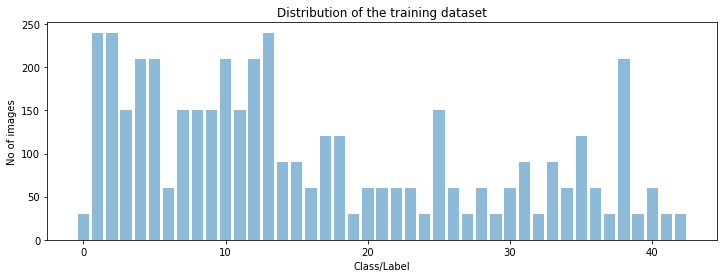

In [11]:
# dist of validation set
show_dist(y_validation)

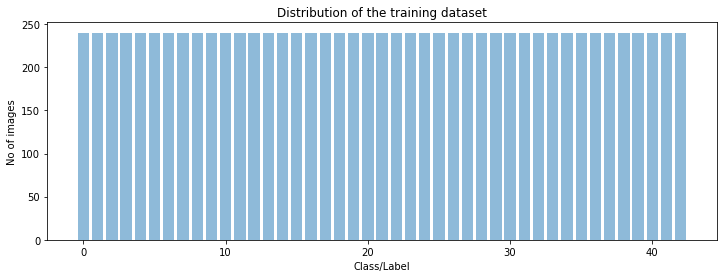

In [12]:
X_validation_extended, y_validation_extended = extend_data(X_validation_gry, y_validation)
show_dist(y_validation_extended)

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [13]:
from sklearn.utils import shuffle

# X_train, y_train = shuffle(X_train, y_train)
X_train_extended, y_train_extended = shuffle(X_train_extended, y_train_extended)
X_validation_extended, y_validation_extended = shuffle(X_validation_extended, y_validation_extended)




## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [14]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [15]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # shape = [kernel_size, kernel_size, input_depth, output_depth]
    # input is 32 by 32 and we want 28 by 28 
    # o_ht = (i_ht - filter_ht + 1)/vertical_stride
    # 28 = (32 -f + 1)/1  i.e 28 = 33 - f i.e f = 5 i.e. filter height = 5
    # since input and putput are square the filter width = 5 too
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [16]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [17]:
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
# print("Loss is ", loss_operation)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [18]:
inference_operation = tf.argmax(logits, 1)
correct_prediction = tf.equal(inference_operation, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    inference_data = np.array([])
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
#         accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        accuracy, loss, inference = sess.run([accuracy_operation, loss_operation, inference_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        inference_data = np.append(inference_data, inference)
    return total_accuracy / num_examples, total_loss / num_examples, inference_data
#     return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [19]:
import time
def training_model(X_data_train, y_data_train, X_data_validation, y_data_validation, dropout):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_data_train)

        print("Training...")
        print()
        for i in range(EPOCHS):
            start_time =  time.time()
    #         X_train, y_train = shuffle(X_train, y_train)
            train_loss_per_epoch = 0
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_data_train[offset:end], y_data_train[offset:end]
                train, loss = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
                train_loss_per_epoch += (loss * len(batch_x))
#                 
            print("Train Loss per epoch= {:.3f}".format(train_loss_per_epoch/num_examples))

#             validation_accuracy = evaluate(X_data_validation, y_data_validation)
#             print("EPOCH {} ...".format(i+1))
#             print("Validation Accuracy = {:.3f}".format(validation_accuracy))
#             print()
            validation_accuracy, validation_loss, inference_data = evaluate(X_data_validation, y_data_validation)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print("Validation Loss = {:.3f}".format(validation_loss))
            print("Time Taken = {:.2f} sec".format(time.time() - start_time))
            print()

        saver.save(sess, './lenet')
        print("Model saved")

In [20]:
# print("shape ", X_train_extended.shape)
# print("shao ", X_validation_gry.shape)

dropouts = [ 0.5 ]  #, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]
for drp in dropouts:
    print("Dropout is ", drp)
    training_model(X_train_extended, y_train_extended, X_validation_extended, y_validation_extended, drp)

Dropout is  0.5
Training...

Train Loss per epoch= 4.974
EPOCH 1 ...
Validation Accuracy = 0.025
Validation Loss = 3.761
Time Taken = 5.46 sec

Train Loss per epoch= 3.758
EPOCH 2 ...
Validation Accuracy = 0.027
Validation Loss = 3.759
Time Taken = 5.08 sec

Train Loss per epoch= 3.752
EPOCH 3 ...
Validation Accuracy = 0.022
Validation Loss = 3.761
Time Taken = 5.08 sec

Train Loss per epoch= 3.603
EPOCH 4 ...
Validation Accuracy = 0.174
Validation Loss = 3.390
Time Taken = 5.11 sec

Train Loss per epoch= 2.955
EPOCH 5 ...
Validation Accuracy = 0.359
Validation Loss = 2.397
Time Taken = 5.09 sec

Train Loss per epoch= 2.433
EPOCH 6 ...
Validation Accuracy = 0.455
Validation Loss = 1.876
Time Taken = 5.09 sec

Train Loss per epoch= 1.984
EPOCH 7 ...
Validation Accuracy = 0.617
Validation Loss = 1.385
Time Taken = 5.10 sec

Train Loss per epoch= 1.560
EPOCH 8 ...
Validation Accuracy = 0.694
Validation Loss = 1.023
Time Taken = 5.09 sec

Train Loss per epoch= 1.228
EPOCH 9 ...
Validation 

Train Loss per epoch= 0.326
EPOCH 72 ...
Validation Accuracy = 0.937
Validation Loss = 0.205
Time Taken = 5.08 sec

Train Loss per epoch= 0.319
EPOCH 73 ...
Validation Accuracy = 0.945
Validation Loss = 0.195
Time Taken = 5.09 sec

Train Loss per epoch= 0.326
EPOCH 74 ...
Validation Accuracy = 0.909
Validation Loss = 0.287
Time Taken = 5.08 sec

Train Loss per epoch= 0.323
EPOCH 75 ...
Validation Accuracy = 0.944
Validation Loss = 0.205
Time Taken = 5.06 sec

Train Loss per epoch= 0.318
EPOCH 76 ...
Validation Accuracy = 0.940
Validation Loss = 0.218
Time Taken = 5.07 sec

Train Loss per epoch= 0.319
EPOCH 77 ...
Validation Accuracy = 0.943
Validation Loss = 0.207
Time Taken = 5.07 sec

Train Loss per epoch= 0.315
EPOCH 78 ...
Validation Accuracy = 0.936
Validation Loss = 0.207
Time Taken = 5.07 sec

Train Loss per epoch= 0.318
EPOCH 79 ...
Validation Accuracy = 0.939
Validation Loss = 0.205
Time Taken = 5.08 sec

Train Loss per epoch= 0.322
EPOCH 80 ...
Validation Accuracy = 0.915
Val

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [30]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
#     saver = tf.train.import_meta_graph('lenet.meta')
#     saver_outside.restore(sess, tf.train.latest_checkpoint('.'))
#     saver.restore(sess, "./lenet")

    test_accuracy, test_loss, inference_data = evaluate(X_test_gry, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Test Loss = {:.3f}".format(test_loss))
    print("inference data ", inference_data)

Test Accuracy = 0.939
Test Loss = 0.221
inference data  [ 16.   1.  38. ...,  32.   7.  10.]


In [40]:
# test_inference_per_class = np.bincount(inference_data)
np.histogram(inference_data, bins=np.arange(42), density=True)

(array([ 0.00526148,  0.05596301,  0.05811543,  0.03762755,  0.05125957,
         0.05086097,  0.01179847,  0.03117028,  0.04129464,  0.04105548,
         0.05070153,  0.03061224,  0.05436862,  0.0571588 ,  0.0213648 ,
         0.01801658,  0.01283482,  0.02750319,  0.03021365,  0.00558036,
         0.00924745,  0.00502232,  0.00980548,  0.01251594,  0.00605867,
         0.03850446,  0.01323342,  0.00502232,  0.01251594,  0.00765306,
         0.01347258,  0.02335778,  0.00637755,  0.01698023,  0.01036352,
         0.02989477,  0.00972577,  0.00526148,  0.05373087,  0.00725446,
         0.01124043]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]))

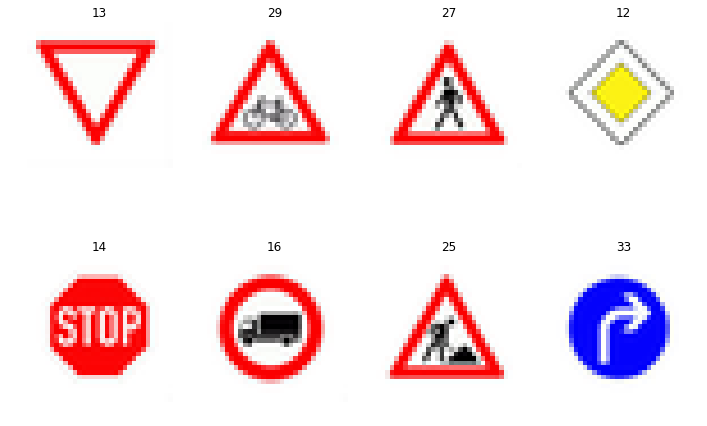

In [32]:
#reading in an image
%matplotlib inline
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

plt.figure(figsize=(12, 16.5))

outside_images = []
outside_labels = [13, 29, 27, 12, 14, 16, 25, 33]

for i, img in enumerate(glob.glob('./test_batch1/*.png')):
#     print(i, img)
    image = mpimg.imread(img)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     print("! " ,image.shape)
    outside_images.append(image)
    plt.subplot(4, 4, i+1)
    plt.imshow(image)
    plt.title(outside_labels[i])
    plt.axis('off')
plt.show()

# convert to numpy array, the expected input type 
outside_images = np.asarray(outside_images)

outside_images_gry = np.sum(outside_images/3, axis=3, keepdims=True)

outside_images_gry = outside_images_gry.astype(np.float, copy=False)

In [34]:
# Now testing outside images with my model
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
import tensorflow as tf
with tf.Session() as sess:
    saver_outside = tf.train.import_meta_graph('lenet.meta')
    saver_outside.restore(sess, "./lenet")
#     saver.restore(sess, tf.train.latest_checkpoint('.'))

    prediction_accuracy, prediction_loss, inference_output = evaluate(outside_images_gry, outside_labels)
    print("Prediction Accuracy = {:.3f}".format(prediction_accuracy))
    print("Prediction Loss = {:.3f}".format(prediction_loss))
    print("Inferred classes:", inference_output)

Prediction Accuracy = 0.000
Prediction Loss = 7.113
Inferred classes: [ 32.  32.  32.  32.  32.  32.  32.  32.]
